## Import Dataset

In [1]:
import pandas as pd

attributes = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type']

dataset = pd.read_csv('data/glass.data', names=attributes)

print(dataset.shape[0], 'records')
dataset.head()

214 records


,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## Data Preprocessing

### Separate Features and Label

In [2]:
X = dataset.drop(['Id','Type'], axis=1)
y = dataset['Type']

print('Features:\n', X)
print('\nLabel:\n', y)

Features:
           RI     Na    Mg    Al     Si     K    Ca    Ba   Fe
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0
..       ...    ...   ...   ...    ...   ...   ...   ...  ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0

[214 rows x 9 columns]

Label:
 0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64


### Split data into Training and Test sets

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print('Training data:', len(X_train))
print('Test data:', len(X_test))

Training data: 171
Test data: 43


### Normalize the feature set

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Dimensionality Reduction

### Linear Discriminant Analysis

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_ = LinearDiscriminantAnalysis()

X_train_ = lda_.fit_transform(X_train, y_train)
X_test_ = lda_.transform(X_test)

### Find the variance ratios of each Linear Discriminant

In [6]:
explained_variances = lda_.explained_variance_ratio_

i=1
print('Variance % of linear discriminants:\n')
for v in explained_variances:
    print('LD'+str(i), float(v)*100)
    i+=1

Variance % of linear discriminants:

LD1 81.1221400450458
LD2 12.892560295638212
LD3 2.898297524886845
LD4 1.792269199324338
LD5 1.2947329351048067


### Plot LD vs Cummulative Variance 

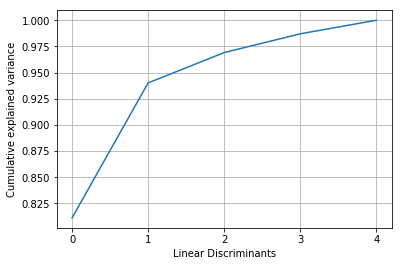

In [7]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
plt.plot(np.cumsum(explained_variances))
plt.xticks(range(0,5))
plt.xlabel('Linear Discriminants')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()
fig.savefig('LDA.png')

## Create, Train and Evaluate model with Linear Discriminants

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

ld = 4
print('Linear Discriminants:', ld)

lda = LinearDiscriminantAnalysis(n_components=ld)

X_train_ld = lda.fit_transform(X_train, y_train)
X_test_ld = lda.transform(X_test)

classifier = RandomForestClassifier(random_state=0)

grid_params = {
    'n_estimators': [10, 20, 40, 60, 80, 100],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]  
}

grid_search = GridSearchCV(
    estimator=classifier,
    param_grid=grid_params,
    scoring='accuracy',
    cv=5, # number of folds
    n_jobs=-1 # all available computing power
)

grid_search.fit(X_train_ld, y_train)

best_parameters = grid_search.best_params_
print('\nBest parameters:\n', best_parameters)

best_result = grid_search.best_score_
print('\nBest training accuracy:', '{0:.2f}%'.format(best_result*100))

model = grid_search.best_estimator_

y_pred = model.predict(X_test_ld)

acc = accuracy_score(y_test, y_pred)
print('\nTest Accuracy:', '{0:.2f}%'.format(acc*100))

cm = confusion_matrix(y_test, y_pred)
print('\nConfusion matrix:\n', cm)

Linear Discriminants: 4

Best parameters:
 {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 60}

Best training accuracy: 61.39%

Test Accuracy: 67.44%

Confusion matrix:
 [[9 2 0 0 0 0]
 [6 8 0 0 0 0]
 [2 0 1 0 0 0]
 [0 0 0 2 0 2]
 [0 0 0 0 1 2]
 [0 0 0 0 0 8]]
